# Clustering

- In this Notebook, Clustering has been applied to the dataset for parking penalties in London.
  
- The clustering techniques that are used are 
  - K-Means
  - K-Modes
  - K Prototype

The dataset has 7 default features and 1 newly added feature for date to divide the dates in to quarters. 

 ### Columns             

 0   Make                 
 1   Colour            
 2   Issue Time           
 3   Contravention Code  
 4   Location             
 5   PA_Details          
 6   Issue Date    


 All these features are in string format. In the below segments, we would separate Numerical features from categorical features and apply clustering techniques on subsets of data. 

  - K-Means
  
            For Numerical feature - ***Issue Time*** we will apply K-Means algorithm to find potential groups on the basis of similarities in the feature


  - K-Modes
  
            For Categorical features - ***Make,	Colour,	Location, Issue Date, Contravention Code and PA_Details*** we will apply K-Modes algorithm to find potential groups on the basis of similarities between these features. As K-means only work for Numerical features. 



  - K Prototype

            To analyse the whole dataset, we will use K-Prototype algorithm. K-Prototype is used when the dataset has both categorical and Numerical features, that we have in our dataset.

### Importing Libraries

In [65]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.simplefilter("ignore")


### Loading Dataset

In [66]:
## Load Dataset
df = pd.read_csv('Project Parking.csv')
df.shape


(380639, 8)

In [67]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,2019-01-01,0.25
1,0,NaN,0:19,16,Anne Street,1456,2019-01-01,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,2019-01-01,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,2019-01-01,0.33
4,0,NaN,0:22,62,Warton Road,1456,2019-01-01,0.37


## Data Preprocessing

As the data is not in correct format, we will clean the data by removing unwanted and test records. Also date has been changed to correct format and Numerical features are also converted from strings to numerical format. 



### Dates
- Dates have been divided into quarters manually for better clustering results.

In [68]:
# Applying the condition
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-01')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-02')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-03')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-04')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-05')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-06')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-07')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-08')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-09')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-10')] = 'Q4'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-11')] = 'Q4'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-12')] = 'Q4'

df['Issue Date'].loc[df['Issue Date'].str.contains('2020-01')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-02')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-03')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-04')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-05')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-06')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-07')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-08')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-09')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-10')] = 'Q8'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-11')] = 'Q8'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-12')] = 'Q8'

df['Issue Date'].loc[df['Issue Date'].str.contains('2021-01')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-02')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-03')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-04')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-05')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-06')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-07')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-08')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-09')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-10')] = 'Q12'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-11')] = 'Q12'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-12')] = 'Q12'

In [69]:
df['Issue Date'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12'], dtype=object)

### Issue Time
- Time has been converted in to a decimal format to deal it as a Numeric Feature. 
  
#### Steps of conversion in the excel file: 
1. Multiplied the time with 60
2. Change format from time to Number


12:15 = 12.25

19:30 = 19.5

01:45 = 01.75

In [70]:
df['Issue Time Decimal']


0          0.25
1          0.32
2          0.32
3          0.33
4          0.37
          ...  
380634    15.52
380635    16.42
380636    16.50
380637    17.07
380638    17.13
Name: Issue Time Decimal, Length: 380639, dtype: float64

In [71]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,Q1,0.25
1,0,NaN,0:19,16,Anne Street,1456,Q1,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,Q1,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,Q1,0.33
4,0,NaN,0:22,62,Warton Road,1456,Q1,0.37


### Contravention Code

In [72]:
df['Contravention Code'].unique().shape

(136,)

In [73]:
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', 'W23',
       'W01', 'W61', 'W63', '21', '12', '19', '01a', '6', '27', '11u',
       '30', '54', '26', '73u', '82u)', '01o)', '2', '83', '73', '165)',
       '45', '11u)', '47', '80', '92', '87', '28', '48', '5', 'W12', '91',
       '62g', '82', '23g', '86', 'W02', '05u', '23c', '11', '85', '82u',
       '95', '8', '35', 'W62', '22', '10', '62g)', '80u', 'W27', 'W87',
       '61', 'W21', '71', 'W26', 'W11', '81', 'W06', '49', '23', '20',
       'W57', 'W19', 'W45', 'W47', '55', 'W01A', 'W25', 'W20', 'W93',
       '24', 'W24', '43', '70', '23r', 'W41', 'W04', '9', 'W16', 'W05',
       'W30', 'W92', '61g)', 'W48', 'W14', 'W73', 'W91', 'W31', 'W49',
       '96', '56', 'W95', 'W46', '23s', 'W40', 'W99', '18', '4', '63',
       'W82', 'W22', '73u)', 'W89', '61g', 'W09', 'W83', 'W08', '23e',
       '164', 'W35', '23d', '93', 'W70', 'W55', 'W56', '7', '89', '232',
       '23p', '5u)', 'W42', 'W10', '36', 'W54', '57', 'W90'], dtype=

- Dropping Contravention codes which contains 'W'

In [74]:
df = df[~df['Contravention Code'].str.contains('W')]

In [75]:
# df['Contravention Code']=df['Contravention Code'].str.replace("u","")
# df['Contravention Code']=df['Contravention Code'].str.replace("g","")
# df['Contravention Code']=df['Contravention Code'].str.replace("a","")
# df['Contravention Code']=df['Contravention Code'].str.replace("c","")
# df['Contravention Code']=df['Contravention Code'].str.replace("o","")
# df['Contravention Code']=df['Contravention Code'].str.replace(")","")
# df['Contravention Code']=df['Contravention Code'].str.replace("d","")
# df['Contravention Code']=df['Contravention Code'].str.replace("p","")
# df['Contravention Code']=df['Contravention Code'].str.replace("e","")
# df['Contravention Code']=df['Contravention Code'].str.replace("s","")
# df['Contravention Code']=df['Contravention Code'].str.replace("r","")
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', '21', '12',
       '19', '01a', '6', '27', '11u', '30', '54', '26', '73u', '82u)',
       '01o)', '2', '83', '73', '165)', '45', '11u)', '47', '80', '92',
       '87', '28', '48', '5', '91', '62g', '82', '23g', '86', '05u',
       '23c', '11', '85', '82u', '95', '8', '35', '22', '10', '62g)',
       '80u', '61', '71', '81', '49', '23', '20', '55', '24', '43', '70',
       '23r', '9', '61g)', '96', '56', '23s', '18', '4', '63', '73u)',
       '61g', '23e', '164', '23d', '93', '7', '89', '232', '23p', '5u)',
       '36', '57'], dtype=object)

In [76]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,Q1,0.25
1,0,NaN,0:19,16,Anne Street,1456,Q1,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,Q1,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,Q1,0.33
4,0,NaN,0:22,62,Warton Road,1456,Q1,0.37


### Location
- Dropping Test Locations

In [77]:
df = df[~df['Location'].str.contains('Test')]

###  Null values

- Dropping Null values from whole dataset

In [78]:
df.dropna(inplace=True)
df.shape

(375880, 8)

###  Make
As there are entries with different cases, we convert the 'make' column in to lower case for all rows and then process the data.

- Dropping data where Make is 0 and 1n/a

In [79]:
df.Make=df.Make.str.lower()
df['Make'].unique()

array(['audi', 'bmw', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai',
       'alfa romeo', 'austin', 'bentley', 'iveco', 'jaguar',
       'austin rover', 'autobianchi', 'bedford', 'dacia', '1n/a', 'a c',
       'aixam', 'daf', 'abarth', 'armstrong siddely', 'bmc', 'isuzu',
       'aston martin', 'daewoo', 'dodge', 'ds', 'infinity', 'adly',
       'daihatsu', 'eunos', 'ferrari', 'fiat', 'alvis', 'jeep', 'kia',
       'land rover', 'ldv', 'lexus', 'mercedes benz', 'mercedes-benz',
       'mini', 'mitsubishi', 'nissan', 'peugeot', 'porsche', 'levc',
       'opel', 'mercedes', 'range rover', 'maxus', 'mazda', 'renault',
       'lti', 'man', 'mg', 'piaggio', 'maserati', 'proton', 'leyland',
       'lincoln', 'london taxi', 'matra', 'mahindra', 'malaguti',
       'reliant', 'mercury', 'saab', 'scania', 'seat', 'skoda', 'smart',
       'subaru', 'toyota', 'vauxhall', 'rolls royce', 'rolls-royce',
       'volkswagen', 'ssang yong', 'taxi', 'rover', 'suzuki', 'ssangyong',
       'unknown', '

In [80]:
df.drop(df.index[df['Make'] == 0], inplace = True)
df.drop(df.index[df['Make'] == '1n/a'], inplace = True)
df['Make'].loc[df['Make'].str.contains('harley davison')] = 'harley davidson'
df['Make'].loc[df['Make'].str.contains('mercedes')] = 'mercedes'
df['Make'].loc[df['Make'].str.contains('lamborghini')] = 'lambourghini'
df['Make'].loc[df['Make'].str.contains('rolls-royce')] = 'rolls royce'
df['Make'].loc[df['Make'].str.contains('ssangyong')] = 'ssang Yong'
df['Make'].loc[df['Make'].str.contains('SSANGYONG')] = 'Ssang Yong'
df.shape

(375877, 8)

In [81]:
df['Make'].unique()

array(['audi', 'bmw', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai',
       'alfa romeo', 'austin', 'bentley', 'iveco', 'jaguar',
       'austin rover', 'autobianchi', 'bedford', 'dacia', 'a c', 'aixam',
       'daf', 'abarth', 'armstrong siddely', 'bmc', 'isuzu',
       'aston martin', 'daewoo', 'dodge', 'ds', 'infinity', 'adly',
       'daihatsu', 'eunos', 'ferrari', 'fiat', 'alvis', 'jeep', 'kia',
       'land rover', 'ldv', 'lexus', 'mercedes', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'porsche', 'levc', 'opel', 'range rover',
       'maxus', 'mazda', 'renault', 'lti', 'man', 'mg', 'piaggio',
       'maserati', 'proton', 'leyland', 'lincoln', 'london taxi', 'matra',
       'mahindra', 'malaguti', 'reliant', 'mercury', 'saab', 'scania',
       'seat', 'skoda', 'smart', 'subaru', 'toyota', 'vauxhall',
       'rolls royce', 'volkswagen', 'ssang yong', 'taxi', 'rover',
       'suzuki', 'ssang Yong', 'unknown', 'tesla', 'singer',
       'vanden plas', 'volvo', 'triumph', 'lo

###  Colour
As there are entries with different cases, we convert the 'make' column in to lower case for all rows and then process the data.


In [82]:
df['Colour'].unique()

array(['Black', 'BLACK', 'black', 'Blue', 'BLUE', 'blue', 'Green',
       'GREEN', 'Grey', 'Other', 'OTHER', 'Purple', 'Red', 'RED', 'red',
       'Silver', 'SILVER', 'White', 'Bronze', 'Brown', 'GREY', 'grey',
       'silver', 'Unspecified', 'Maroon', 'maroon', 'WHITE', 'BROWN',
       'Burgundy', 'Orange', 'white', 'Gold', 'Yellow', 'UNSPECIFIED',
       'PURPLE', 'ORANGE', 'YELLOW', 'gold', 'Beige', 'Pink', 'Cream',
       'Multi-Coloured', 'BEIGE', '1n/a', 'BLack', 'BRONZE', 'GOLD',
       'Light Blue', 'green', 'MAROON', 'MAUVE', 'orange', 'yellow',
       'unspecified', 'other', 'TURQUOISE', 'Mauve', 'brown', 'cream',
       'MULTI-COLOURED'], dtype=object)

In [83]:
df.Colour=df.Colour.str.lower()
df.drop(df.index[df['Colour'] == '1n/a'], inplace = True)
df['Colour'].unique()

array(['black', 'blue', 'green', 'grey', 'other', 'purple', 'red',
       'silver', 'white', 'bronze', 'brown', 'unspecified', 'maroon',
       'burgundy', 'orange', 'gold', 'yellow', 'beige', 'pink', 'cream',
       'multi-coloured', 'light blue', 'mauve', 'turquoise'], dtype=object)

In [84]:
df['PA_Details'].unique()

array(['1500', '3254', '1498', '3299', '1434', 'PN3260', '1433', '1522',
       '1508', 'PN1435', '3264', '1435', '1507', '1518', '3216', 'PN1313',
       'PN3288', '1524', '1519', '1504', 'PN1498', '1318', '1142', '1520',
       '1306', '3292', '3191', '3295', '1247', '1516', '1453', '1313',
       '1521', '1462', 'PN3239', '1454', '3293', '1491', '1463', '1456',
       'PN1462', 'PN1433', '1281', 'PN1463', '1410', 'PN1438', '1510',
       '1464', 'PN1306', '1499', '1438', 'PN1458', '1523', '1146', '1514',
       '1458', '3237', '3266', 'PN3269', 'PN1464', '1485', 'PN1453',
       '1490', 'PN1318', 'PN1419', '3298', '1252', 'PN1410', '3239',
       'PN1142', '3247', 'PN1481', '3328', 'PN1401', 'PN1466', 'PN1499',
       '3326', '1461', 'PN1437', '1473', 'PN1456', 'PN1387', '1387',
       'PN1468', '1468', '1278', '1481', '3272', '1466', 'PN1473', '1419',
       '1502', 'PN1454', '1145', '3289', '3235', '1513', '1457', '1409',
       '3156', 'PN3266', 'PN3278', '3301', 'PN1482', '3318'

In [85]:
df.head(20),df.shape

(     Make Colour Issue Time Contravention Code            Location PA_Details  \
 162  audi  black       9:31                 19         Antwerp Way       1500   
 163  audi  black      10:30                 12        First Avenue       3254   
 164  audi  black      10:30                 12       Ingestre Road       1498   
 165  audi  black      10:30                 12    Lawrence Road E6       3299   
 166  audi  black      10:30                 12     Napier Road E15       1434   
 167  audi  black      10:30                 19    Biggerstaff Road     PN3260   
 168  audi  black      10:30                 19        Grant Street       3299   
 169  audi  black      10:30                 19          Kings Road       1433   
 170  audi  black      10:30                 19  Upperton Road West       1522   
 171  audi  black      10:30                 21     Malmesbury Road       1508   
 172  audi  black      10:30                 25      Redclyffe Road       1433   
 173  audi  blac

In [86]:
len(df["Issue Date"].unique()),df["Issue Date"].unique()

(12,
 array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
        'Q12'], dtype=object))

In [87]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


In [88]:
df.tail()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
380634,yamaha,white,15:31,54,Broadway,1485,Q12,15.52
380635,yamaha,white,16:25,1,High Street North,3237,Q12,16.42
380636,yamaha,white,16:30,81,Stratford Multi Storey Car Park,PN1458,Q12,16.50
380637,yamaha,white,17:04,62,Westfield Avenue,1475,Q12,17.07
380638,yamaha,white,17:08,1,Harold Road,3237,Q12,17.13


In [89]:
df.iloc[214000:214015,: ]

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
218255,skoda,silver,8:16,19,Wolsey Avenue,1517,Q9,8.27
218256,skoda,silver,8:17,12,Folkestone Road,PN1490,Q9,8.28
218257,skoda,silver,8:19,1,MacGregor Road,1468,Q9,8.32
218258,skoda,silver,8:21,85,Will Thorne Pavillion_,PN1485,Q9,8.35
218259,skoda,silver,8:26,12,Katherine Road,3299,Q9,8.43
218260,skoda,silver,8:27,12,Katherine Road,3299,Q9,8.45
218261,skoda,silver,8:27,11u,Bedford Road,3292,Q9,8.45
218262,skoda,silver,8:29,12,Litchfield Avenue,1507,Q9,8.48
218263,skoda,silver,8:29,12,Skeffington Road,PN3285,Q9,8.48
218264,skoda,silver,8:30,12,Strone Road,PN1401,Q9,8.50


### Converting Type of Numerical features

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375865 entries, 162 to 380638
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Make                375865 non-null  object 
 1   Colour              375865 non-null  object 
 2   Issue Time          375865 non-null  object 
 3   Contravention Code  375865 non-null  object 
 4   Location            375865 non-null  object 
 5   PA_Details          375865 non-null  object 
 6   Issue Date          375865 non-null  object 
 7   Issue Time Decimal  375865 non-null  float64
dtypes: float64(1), object(7)
memory usage: 25.8+ MB


### Saving processed data into csv file

In [91]:
df.to_csv('Processed.csv')

## Dividing data in to numerical and categorical features

In [92]:
df.columns

Index(['Make', 'Colour', 'Issue Time', 'Contravention Code', 'Location',
       'PA_Details', 'Issue Date', 'Issue Time Decimal'],
      dtype='object')

In [106]:
df_categorical = df[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date']]
df_numerical = df[['Issue Time Decimal']]

In [94]:
df_categorical.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date
162,audi,black,19,Antwerp Way,1500,Q1
163,audi,black,12,First Avenue,3254,Q1
164,audi,black,12,Ingestre Road,1498,Q1
165,audi,black,12,Lawrence Road E6,3299,Q1
166,audi,black,12,Napier Road E15,1434,Q1


In [95]:
df_numerical.head()

162     9.52
163    10.50
164    10.50
165    10.50
166    10.50
Name: Issue Time Decimal, dtype: float64

# Clustering

## K Means Clustering

### Elbow method to find optimal number of Clusters

In [107]:
type(df_numerical)

pandas.core.frame.DataFrame

### Converting series to dataframe

In [105]:
df_numerical

,index,Issue Time Decimal
0,162,9.52
1,163,10.50
2,164,10.50
3,165,10.50
4,166,10.50
...,...,...
375860,380634,15.52
375861,380635,16.42
375862,380636,16.50
375863,380637,17.07


Text(0.5, 1.0, 'Elbow Method For Optimal k')

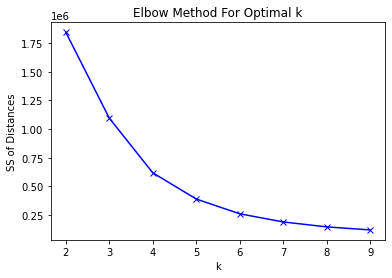

In [125]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(2,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(df_numerical)
       SS_distances.append(k_means.inertia_)
   
centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

### 4 is optimal number for clusters in numerical features 

In [109]:
k_means = KMeans(n_clusters=4)
k_means= k_means.fit(df_numerical)
labels = k_means.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([  9783,  63211, 141798, 161073]))

### Plotting data 

### 1. 'Issue Time' with respect to the index

In [110]:
k_means.cluster_centers_

array([[ 2.28774908],
       [17.72671017],
       [13.25016328],
       [ 9.70876492]])

In [114]:
centers

array([[ 2.28774908],
       [17.72671017],
       [13.25016328],
       [ 9.70876492]])

In [119]:
index_center = [[180000],[180000],[180000],[180000]]

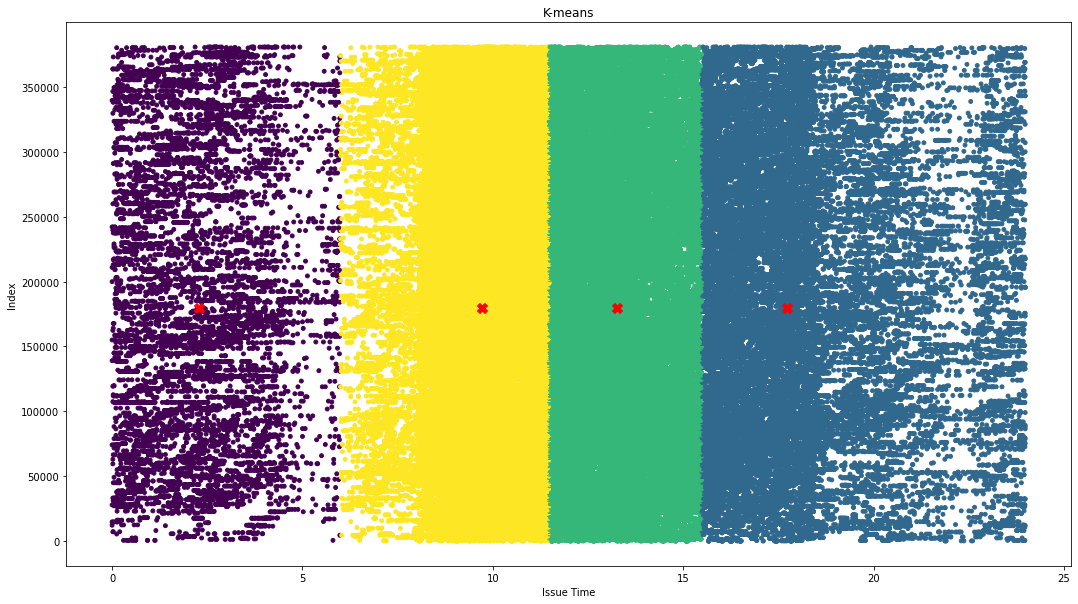

In [124]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(18,10))
plt.scatter(df_numerical['Issue Time Decimal'],df.index,c=labels,s=15)
plt.scatter(centers[:,0], index_center, color ='red', marker='X', s=100) 
plt.xlabel('Issue Time')
plt.ylabel('Index')
plt.title('K-means')
plt.show()

### 2. 'Issue Time' and 'PA_Details'

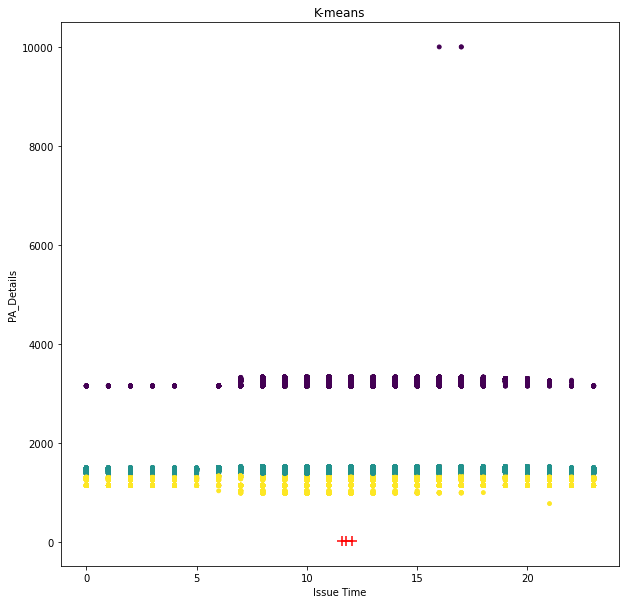

In [38]:


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(df_numerical['Issue Time'],df_numerical['PA_Details'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.ylabel('PA_Details')
plt.xlabel('Issue Time')
plt.title('K-means')
plt.show()

### 3. 'PA_Details' and 'Contravention Code'

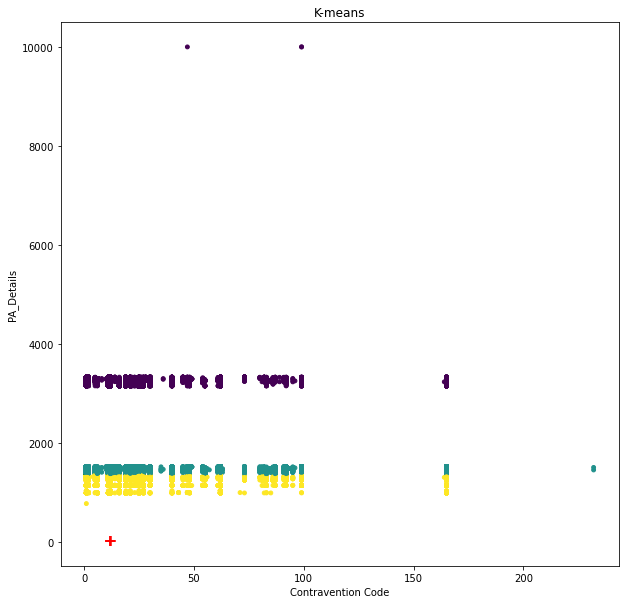

In [39]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10,10))
plt.scatter(df_numerical['Contravention Code'],df_numerical['PA_Details'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.ylabel('PA_Details')
plt.xlabel('Contravention Code')
plt.title('K-means')
plt.show()

In [40]:
df_numerical.head()

,Issue Time,Contravention Code,PA_Details
162,9,19,1500
163,10,12,3254
164,10,12,1498
165,10,12,3299
166,10,12,1434


In [41]:
df_numerical.iloc[:,0:3]

,Issue Time,Contravention Code,PA_Details
162,9,19,1500
163,10,12,3254
164,10,12,1498
165,10,12,3299
166,10,12,1434
...,...,...,...
380634,15,54,1485
380635,16,1,3237
380636,16,81,1458
380637,17,62,1475


In [42]:
df_numerical['clusters_k_means'] = labels
df_numerical.head()

,Issue Time,Contravention Code,PA_Details,clusters_k_means
162,9,19,1500,1
163,10,12,3254,0
164,10,12,1498,1
165,10,12,3299,0
166,10,12,1434,1


### Plotting in 2 dimensions by PCA Analysis and reducing dimensions to 2 

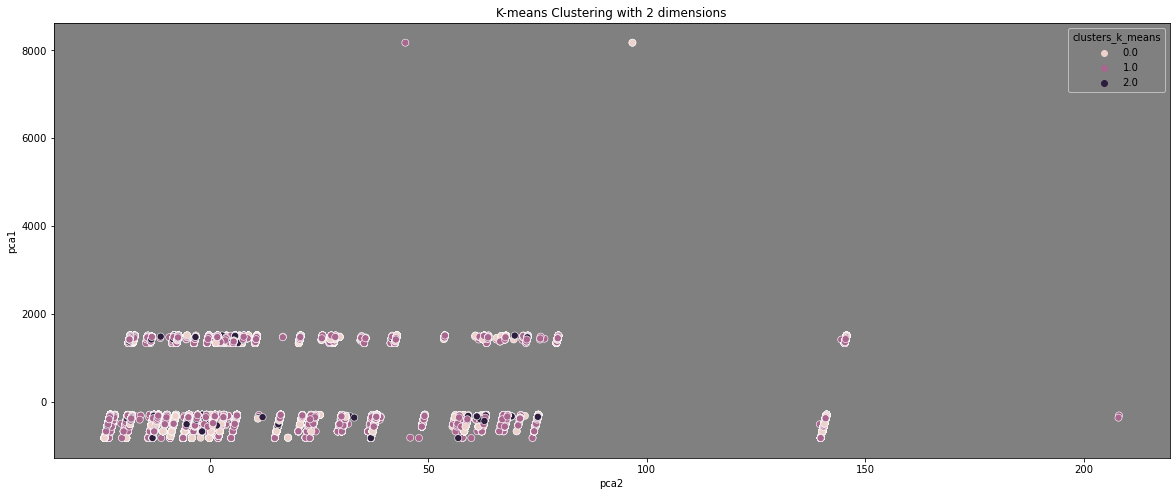

In [43]:
from sklearn.decomposition import PCA
pca_num_components = 2
plt.rcParams['axes.facecolor'] = 'grey'
reduced_data = PCA(n_components=pca_num_components).fit_transform(df_numerical.iloc[:,0:3])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
plt.figure(figsize=(20,8))
sns.scatterplot(x="pca2", y="pca1", hue=df_numerical['clusters_k_means'], data=results,s=50)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Visualizing 3-D numeric data with Scatter Plots


Text(0.5, 0, 'PA_Details')

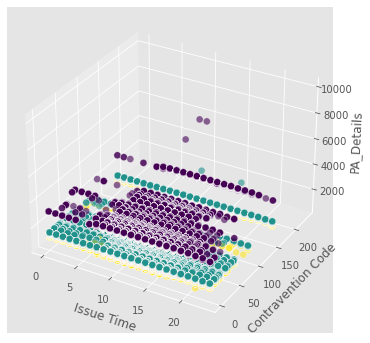

In [177]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_numerical['Issue Time']
ys = df_numerical['Contravention Code']
zs = df_numerical['PA_Details']
ax.scatter(xs, ys, zs, s=50, alpha=0.6,c=labels, edgecolors='w')

ax.set_xlabel('Issue Time')
ax.set_ylabel('Contravention Code')
ax.set_zlabel('PA_Details')

## K MODES Clustering

In [45]:
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [46]:
df_categorical.head()

,Make,Colour,Issue Date,Location
162,Audi,Black,Q1Y1,Antwerp Way
163,Audi,Black,Q1Y1,First Avenue
164,Audi,Black,Q1Y1,Ingestre Road
165,Audi,Black,Q1Y1,Lawrence Road E6
166,Audi,Black,Q1Y1,Napier Road E15


### Elbow Method for optimal number of clusters

In [47]:
# Choosing optimal K
cost = []
for cluster in range(2, 6):
    try:
        kmodes = KModes(n_clusters = cluster)
        kmodes.fit_predict(df_categorical)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2, 6), 'Cost': cost})

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [48]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

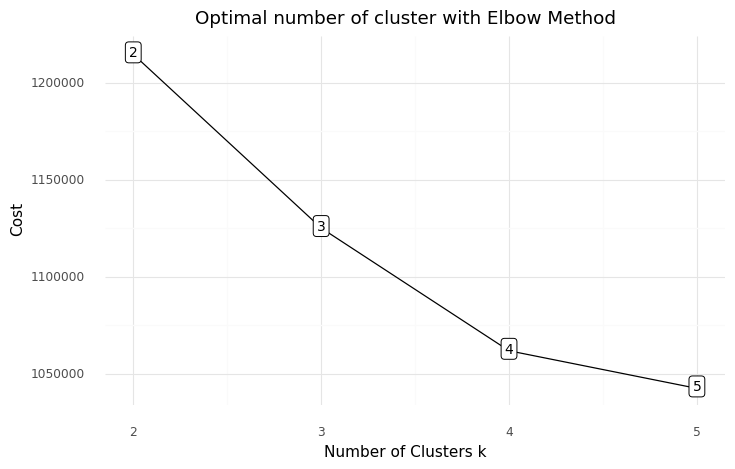

<ggplot: (8768386113033)>

In [49]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Optimal number of clusters for Categorical data = 4

In [50]:
kmodes = KModes(n_clusters = 4)
kmodes.fit_predict(df_categorical)
cost=kmodes.cost_
labels_kmode = kmodes.labels_

In [51]:
labels_kmode

array([0, 0, 0, ..., 3, 1, 1], dtype=uint16)

In [52]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([176028,  79977,  68033,  51831]))

In [53]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019


In [54]:
df_new=df

### Adding cluster labels in the dataframe

In [55]:
df_new['clusters_k_means'] = labels
df_new['clusters_k_mode'] = labels_kmode
df_new.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0


In [56]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0


## K Prototype for complete dataset

In [57]:
from kmodes.kprototypes import KPrototypes

In [58]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0


- Keeping the original features of the dataset

In [59]:
df =df.iloc[:,0:7]
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1
163,Audi,Black,10,12,First Avenue,3254,Q1Y1
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375869 entries, 162 to 380638
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Make                375869 non-null  object
 1   Colour              375869 non-null  object
 2   Issue Time          375869 non-null  int64 
 3   Contravention Code  375869 non-null  int64 
 4   Location            375869 non-null  object
 5   PA_Details          375869 non-null  int64 
 6   Issue Date          375869 non-null  object
dtypes: int64(3), object(4)
memory usage: 31.0+ MB


- Inspecting the categorical variables

In [61]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Make           210
Colour          60
Location      1631
Issue Date      12
dtype: int64

- Inspecting the Numerical variables

In [62]:
# Inspect the numerical variables
df.describe()

,Issue Time,Contravention Code,PA_Details
count,375869.000000,375869.000000,375869.000000
mean,11.698749,23.073507,1823.647766
std,3.525302,34.907346,758.566191
min,0.000000,1.000000,777.000000
25%,9.000000,2.000000,1433.000000
50%,11.000000,12.000000,1468.000000
75%,14.000000,21.000000,1519.000000
max,23.000000,232.000000,9999.000000


In [63]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Make', 'Colour', 'Location', 'Issue Date']
Categorical columns position  : [0, 1, 4, 6]


In [64]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['Audi', 'Black', 9, ..., 'Antwerp Way', 1500, 'Q1Y1'],
       ['Audi', 'Black', 10, ..., 'First Avenue', 3254, 'Q1Y1'],
       ['Audi', 'Black', 10, ..., 'Ingestre Road', 1498, 'Q1Y1'],
       ...,
       ['YAMAHA', 'WHITE', 16, ..., 'Stratford Multi Storey Car Park',
        1458, 'Q4Y3'],
       ['Yamaha', 'White', 17, ..., 'Westfield Avenue', 1475, 'Q4Y3'],
       ['Yamaha', 'White', 17, ..., 'Harold Road', 3237, 'Q4Y3']],
      dtype=object)

### K Prototype

In [65]:
kprototype = KPrototypes(n_clusters = 4)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)


array([3, 0, 3, ..., 3, 3, 0], dtype=uint16)

In [66]:
labels_kprototype = kprototype.labels_

### Adding cluster labels in the dataframe

In [67]:
df_new['clusters_k_prototype'] = labels_kprototype
df_new.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,3
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,3
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,3


### Saving cluster lables to clustered_data.csv file.

In [68]:
df_new.to_csv('clustered_data.csv')

In [69]:
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int32), array([ 80952, 241777,  53140]))

In [70]:
type(labels)

numpy.ndarray

### Visualising count of records in each cluster

- "Count of records in each cluster in Clustered data for Numerical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Numerical Features')

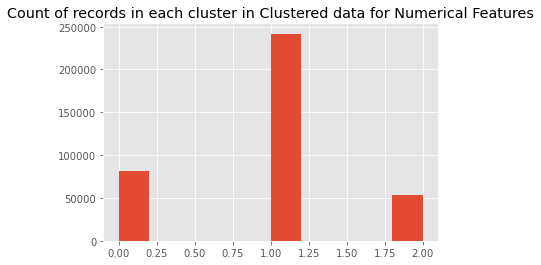

In [71]:
a = np.hstack(labels)
_ = plt.hist(a)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Numerical Features")

In [72]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([176028,  79977,  68033,  51831]))

- "Count of records in each cluster in Clustered data for Categorical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Categorical Features')

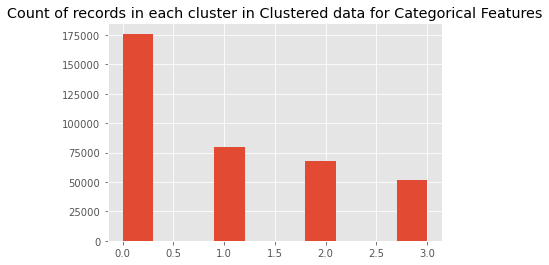

In [73]:
b = np.hstack(labels_kmode)
_ = plt.hist(b)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Categorical Features")

In [74]:
np.unique(labels_kprototype, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([ 80952,  13384,  50161, 231372]))

- "Count of records in each cluster in Clustered data for all Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for all Features')

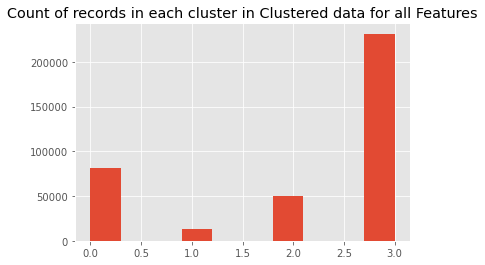

In [75]:
c= np.hstack(labels_kprototype)
_ = plt.hist(c)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for all Features")

## K MODES Clustering with actual date

In [76]:
## Load Dataset
df2 = pd.read_csv('clustered_data.csv')

df2.head()


,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,3
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,0
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,3
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,0
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,3


In [77]:
df_categorical2  = df2[['Make','Colour',	'Issue Date Original',	'Location']]

In [78]:
df_categorical2.head()

,Make,Colour,Issue Date Original,Location
0,Audi,Black,2-Jan-2019,Antwerp Way
1,Audi,Black,2-Jan-2019,First Avenue
2,Audi,Black,2-Jan-2019,Ingestre Road
3,Audi,Black,2-Jan-2019,Lawrence Road E6
4,Audi,Black,2-Jan-2019,Napier Road E15


### Elbow Method for optimal number of clusters

In [79]:
# Choosing optimal K
cost2 = []
for cluster in range(2, 6):
    try:
        kmodes2 = KModes(n_clusters = cluster)
        kmodes2.fit_predict(df_categorical2)
        cost2.append(kmodes2.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2, 6), 'Cost': cost2})

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [80]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

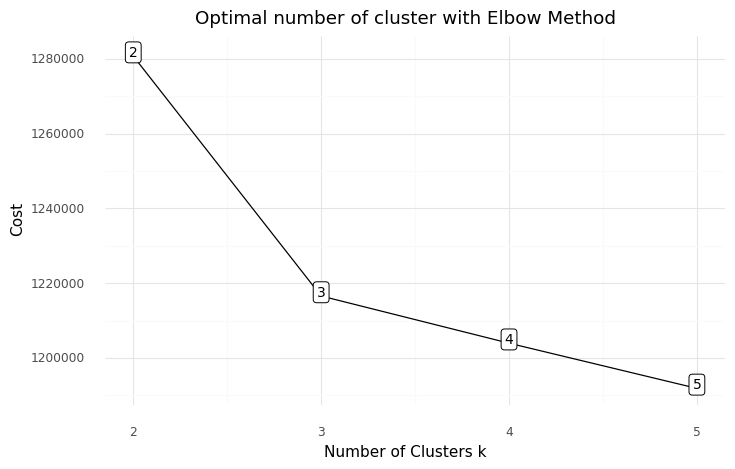

<ggplot: (8768385836525)>

In [81]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Optimal number of clusters for Categorical data = 3

In [82]:
kmodes2 = KModes(n_clusters = 3)
kmodes2.fit_predict(df_categorical2)
cost=kmodes2.cost_
labels_kmode2 = kmodes2.labels_

In [83]:
labels_kmode2

array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [84]:
np.unique(labels_kmode2, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([243101,  76372,  56396]))

In [85]:
df2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,3
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,0
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,3
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,0
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,3


In [86]:
df_new2=df2

### Adding cluster labels in the dataframe

In [87]:

df_new2['clusters_k_mode'] = labels_kmode2
df_new2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,3
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,0
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,3
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,0
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,3


In [88]:
df2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,3
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,0
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,3
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,0
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,3


## K Prototype for complete dataset

In [89]:
from kmodes.kprototypes import KPrototypes

In [90]:
df2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,3
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,0
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,3
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,0
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,3


In [91]:
df2 =df2[['Make','Colour','Issue Time','Contravention Code','Location','PA_Details','Issue Date Original']]
df2.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date Original
0,Audi,Black,9,19,Antwerp Way,1500,2-Jan-2019
1,Audi,Black,10,12,First Avenue,3254,2-Jan-2019
2,Audi,Black,10,12,Ingestre Road,1498,2-Jan-2019
3,Audi,Black,10,12,Lawrence Road E6,3299,2-Jan-2019
4,Audi,Black,10,12,Napier Road E15,1434,2-Jan-2019


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375869 entries, 0 to 375868
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Make                 375869 non-null  object
 1   Colour               375869 non-null  object
 2   Issue Time           375869 non-null  int64 
 3   Contravention Code   375869 non-null  int64 
 4   Location             375869 non-null  object
 5   PA_Details           375869 non-null  int64 
 6   Issue Date Original  375869 non-null  object
dtypes: int64(3), object(4)
memory usage: 20.1+ MB


In [93]:
# Inspect the categorical variables
df2.select_dtypes('object').nunique()

Make                    210
Colour                   60
Location               1631
Issue Date Original    1085
dtype: int64

In [94]:
# Inspect the numerical variables
df2.describe()

,Issue Time,Contravention Code,PA_Details
count,375869.000000,375869.000000,375869.000000
mean,11.698749,23.073507,1823.647766
std,3.525302,34.907346,758.566191
min,0.000000,1.000000,777.000000
25%,9.000000,2.000000,1433.000000
50%,11.000000,12.000000,1468.000000
75%,14.000000,21.000000,1519.000000
max,23.000000,232.000000,9999.000000


In [95]:
# Get the position of categorical columns
catColumnsPos2 = [df2.columns.get_loc(col) for col in list(df2.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos2))

Categorical columns           : ['Make', 'Colour', 'Location', 'Issue Date Original']
Categorical columns position  : [0, 1, 4, 6]


In [96]:
# Convert dataframe to matrix
dfMatrix2 = df2.to_numpy()
dfMatrix2

array([['Audi', 'Black', 9, ..., 'Antwerp Way', 1500, '2-Jan-2019'],
       ['Audi', 'Black', 10, ..., 'First Avenue', 3254, '2-Jan-2019'],
       ['Audi', 'Black', 10, ..., 'Ingestre Road', 1498, '2-Jan-2019'],
       ...,
       ['YAMAHA', 'WHITE', 16, ..., 'Stratford Multi Storey Car Park',
        1458, '31/12/2021'],
       ['Yamaha', 'White', 17, ..., 'Westfield Avenue', 1475,
        '31/12/2021'],
       ['Yamaha', 'White', 17, ..., 'Harold Road', 3237, '31/12/2021']],
      dtype=object)

In [97]:
kprototype2 = KPrototypes(n_clusters = 3)
kprototype2.fit_predict(dfMatrix2, categorical = catColumnsPos)


array([1, 2, 1, ..., 1, 1, 2], dtype=uint16)

In [98]:
labels_kprototype2 = kprototype2.labels_

### Adding cluster labels in the dataframe

In [99]:
df_new2['clusters_k_prototype'] = labels_kprototype2
df_new2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,1,0,1
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,0,0,2
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,1,0,1
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,0,0,2
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,1,0,1


### Saving CLustered labels in clustered_data_with_Actual_date.csv file

In [100]:
df_new2.to_csv('clustered_data_with_Actual_date.csv')

### Visualising count of records in each cluster

In [101]:
np.unique(labels_kmode2, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([243101,  76372,  56396]))

- "Count of records in each cluster in Clustered data for Categorical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Categorical Features')

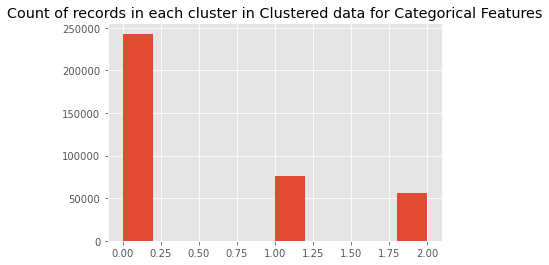

In [102]:
b2 = np.hstack(labels_kmode2)
_ = plt.hist(b2)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Categorical Features")

In [103]:
np.unique(labels_kprototype2, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([ 53140, 241777,  80952]))

- "Count of records in each cluster in Clustered data for all Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for all Features')

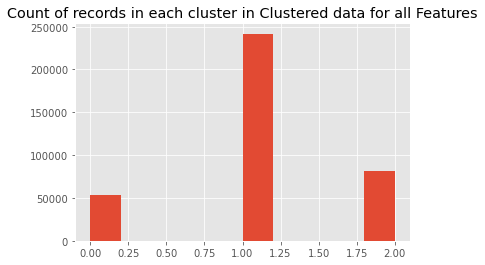

In [104]:
c2= np.hstack(labels_kprototype2)
_ = plt.hist(c2)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for all Features")

## Evaluating clustering 
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [105]:
from sklearn.metrics.cluster import silhouette_score
print('silhouette_score:',metrics.silhouette_score(df_numerical, k_means.labels_))

silhouette_score: 0.7478010991138055


Our silhouette_score is very close to 1 which indicates that our clusters are well apart from each other and clearly distinguished.

## K Prototype analysis on actual dates.

### Creating 3 dataframes for each cluster label in K prototype Method.

In [119]:
cluster1= df_new2.loc[df_new2['clusters_k_prototype'] == 0]
cluster2= df_new2.loc[df_new2['clusters_k_prototype'] == 1]
cluster3= df_new2.loc[df_new2['clusters_k_prototype'] == 2]
cluster1.shape,cluster2.shape,cluster3.shape

((53140, 12), (241777, 12), (80952, 12))

### Keeping original columns of the dataframe

In [120]:
cluster1 = cluster1.iloc[:,1:9]
cluster2 = cluster2.iloc[:,1:9]
cluster3 = cluster3.iloc[:,1:9]
cluster1.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
18,Audi,Black,11,12,Kerrison Road,1313,Q1Y1,2-Jan-2019
24,Audi,Black,11,1,Phoenix Way,1318,Q1Y1,2-Jan-2019
25,Audi,Black,12,11,Brunel Street,1142,Q1Y1,2-Jan-2019
28,Audi,Black,12,1,Oxford Road,1306,Q1Y1,2-Jan-2019
33,Audi,Black,12,12,Park Avenue,1247,Q1Y1,2-Jan-2019


In [129]:
df['Make'].value_counts(),df['Colour'].value_counts()

(Ford             50004
 BMW              40787
 Mercedes Benz    39047
 Vauxhall         35177
 Volkswagen       34808
                  ...  
 CADILLAC             1
 Moto Guzzi           1
 Moto Morini          1
 Mustang              1
 DAEWOO               1
 Name: Make, Length: 210, dtype: int64,
 Black             80376
 White             65536
 Silver            55743
 Other             49829
 Grey              39702
 Blue              36701
 Red               14055
 Unspecified       11924
 BLACK              3834
 Green              3162
 SILVER             2821
 WHITE              2357
 BLUE               1880
 GREY               1443
 Yellow             1200
 Brown               753
 RED                 646
 red                 446
 Gold                429
 Orange              351
 grey                327
 Purple              321
 Maroon              301
 Beige               249
 Cream               231
 blue                179
 black               165
 GREEN               

In [130]:
df['Make'].value_counts() 

Ford             50004
BMW              40787
Mercedes Benz    39047
Vauxhall         35177
Volkswagen       34808
                 ...  
CADILLAC             1
Moto Guzzi           1
Moto Morini          1
Mustang              1
DAEWOO               1
Name: Make, Length: 210, dtype: int64

### 1. Analysis - "Make" 

No clear grouping of feature 'Make' 

In [135]:
cluster1['Make'].value_counts()

Ford             6749
BMW              5650
Vauxhall         5030
Mercedes Benz    4988
Volkswagen       4735
                 ... 
Bugatti             1
Vanden Plas         1
Daimler             1
DACIA               1
YAMAHA              1
Name: Make, Length: 148, dtype: int64

In [137]:
cluster2['Make'].value_counts()

Ford             32435
BMW              26319
Mercedes Benz    25979
Volkswagen       22809
Vauxhall         22583
                 ...  
ROVER                1
Alvis                1
McLaren              1
Caterham             1
Mahindra             1
Name: Make, Length: 184, dtype: int64

In [138]:
cluster3['Make'].value_counts()

Ford             10820
BMW               8818
Mercedes Benz     8080
Vauxhall          7564
Volkswagen        7264
                 ...  
DAEWOO               1
Dennis               1
Rolls-Royce          1
mazda                1
YAMAHA               1
Name: Make, Length: 162, dtype: int64

### 2. Analysis - "Colour" 

No clear grouping of feature 'Colour' 

In [140]:
cluster1['Colour'].value_counts()

Black             11092
Other              9649
White              8742
Silver             7475
Grey               5567
Blue               5148
Red                2021
Unspecified         922
BLACK               424
Green               417
SILVER              290
WHITE               221
BLUE                191
GREY                136
Yellow              127
Orange              100
Beige                96
Brown                90
RED                  67
Gold                 63
Maroon               57
Bronze               48
Purple               46
red                  26
Cream                24
blue                 20
UNSPECIFIED          16
grey                 13
GREEN                11
Pink                  6
YELLOW                5
Multi-Coloured        4
BEIGE                 4
PURPLE                4
black                 3
BROWN                 3
OTHER                 2
ORANGE                2
white                 2
TURQUOISE             1
green                 1
Light Blue      

In [141]:
cluster2['Colour'].value_counts()

Black             51128
White             43156
Silver            35516
Other             34234
Grey              24384
Blue              23182
Red                9107
Unspecified        8810
BLACK              2124
Green              1870
SILVER             1581
WHITE              1341
BLUE                983
GREY                797
Yellow              734
Brown               424
RED                 369
red                 266
Gold                243
Purple              191
Orange              179
grey                162
Cream               143
Maroon              130
Beige               114
GREEN                92
blue                 84
black                84
white                64
YELLOW               45
Burgundy             43
Bronze               41
silver               30
green                18
BROWN                15
Pink                 13
ORANGE               13
GOLD                 11
BEIGE                 9
OTHER                 7
MAROON                6
BRONZE          

In [142]:
cluster3['Colour'].value_counts()

Black          18156
White          13638
Silver         12752
Grey            9751
Blue            8371
Other           5946
Red             2927
Unspecified     2192
BLACK           1286
SILVER           950
Green            875
WHITE            795
BLUE             706
GREY             510
Yellow           339
Brown            239
RED              210
red              154
grey             152
Gold             123
Maroon           114
Burgundy          86
Purple            84
black             78
blue              75
Orange            72
Cream             64
white             53
GREEN             46
Beige             39
Bronze            33
YELLOW            33
silver            18
BROWN             12
GOLD              11
ORANGE             8
1n/a               8
Pink               7
OTHER              6
BRONZE             6
BEIGE              5
green              5
PURPLE             4
MAUVE              2
gold               2
cream              2
TURQUOISE          1
maroon       

### 3. Analysis - "Issue Time" 

No clear grouping of feature 'Issue Time' 

In [146]:
df['Issue Time'].value_counts()

9     48419
11    46465
10    45439
12    41429
8     38825
13    35899
14    28757
15    21749
16    17708
17    14573
18     8951
7      4058
19     3661
20     3306
2      2359
23     2280
1      2202
0      2191
6      2041
3      1825
21     1465
22     1060
4       820
5       387
Name: Issue Time, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high in the office hours i.e. **8am to 5pm.**

- Most number of fines are in the morning hours of 8:00am and 9:00am.

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [143]:
cluster1['Issue Time'].value_counts()

8     5551
12    5363
11    5359
9     5113
13    4741
10    4096
14    4066
15    3747
16    3464
17    3196
18    2190
7     1244
19     620
1      583
6      549
2      546
23     540
0      485
20     466
3      398
21     318
22     234
4      207
5       64
Name: Issue Time, dtype: int64

- Cluster 1 consists of more fines of morning i.e. 8:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [144]:
cluster2['Issue Time'].value_counts()

9     31816
10    31070
11    30620
12    26650
8     24200
13    23409
14    18210
15    13113
16     9946
17     8212
18     4805
19     2523
20     2515
7      2405
2      1793
23     1709
0      1675
1      1591
3      1411
6      1357
21     1022
22      802
4       600
5       323
Name: Issue Time, dtype: int64

- Cluster 2 consists of more fines of morning i.e. 9:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [145]:
cluster3['Issue Time'].value_counts()

9     11490
11    10486
10    10273
12     9416
8      9074
13     7749
14     6481
15     4889
16     4298
17     3165
18     1956
19      518
7       409
20      325
6       135
21      125
23       31
0        31
1        28
22       24
2        20
3        16
4        13
Name: Issue Time, dtype: int64

- Cluster 3 consists of more fines of morning i.e. 9:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 3:00 am

### 4. Analysis - "Contravention Code" 

No clear grouping of feature 'Contravention Code' 


In [149]:
df['Contravention Code'].value_counts()

12     132490
1       92937
19      36413
62      19136
30      18085
165     16065
25      14787
11       8066
21       5843
40       4984
27       3803
6        3450
16       2701
2        2344
83       2031
99       1931
73       1574
92       1074
55        994
26        949
48        870
23        839
87        819
47        734
54        670
5         400
14        305
82        289
61        226
45        213
86        177
91        161
22         84
81         75
24         70
28         59
80         56
95         47
85         38
49         18
20         10
35          6
43          6
93          6
63          5
10          5
8           5
36          3
232         2
164         2
89          2
18          2
96          2
56          2
7           1
4           1
71          1
57          1
Name: Contravention Code, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132490**
**Contravention Code : 1 - 92937**

- Most number of fines are with **Contravention Code : 12** i.e 132490

- The least number of fines are with **Contravention Codes : 7,4,71,57**  - 1 each

In [150]:
cluster1['Contravention Code'].value_counts()

12     15275
1      14027
19      4595
25      3774
62      3194
165     2845
30      2132
27       909
21       895
40       809
11       710
2        409
6        396
16       389
83       293
99       281
73       249
87       228
26       225
55       216
23       201
54       195
92       170
47       142
48       116
5         71
14        70
91        55
45        51
82        51
86        43
61        34
24        26
81        20
95        14
22         9
80         7
43         6
28         2
71         1
56         1
4          1
85         1
49         1
164        1
Name: Contravention Code, dtype: int64

In [151]:
cluster2['Contravention Code'].value_counts()

12     86407
1      58351
19     24402
62     13462
165    11148
30     11084
25      9178
11      5195
21      3352
40      3035
27      2448
16      2041
6       1817
2       1423
99      1415
83       998
55       680
92       643
73       630
23       550
26       548
48       499
87       462
47       437
54       379
14       219
5        173
61       139
45       107
86       104
91        87
82        83
81        46
80        43
22        37
85        32
95        29
24        29
28        19
49         7
20         7
35         6
93         6
63         5
8          3
10         3
18         2
232        2
96         1
56         1
7          1
36         1
57         1
Name: Contravention Code, dtype: int64

In [152]:
cluster3['Contravention Code'].value_counts()

12     30808
1      20559
19      7416
30      4869
62      2480
11      2161
165     2072
25      1835
21      1596
6       1237
40      1140
83       740
73       695
2        512
27       446
16       271
92       261
48       255
99       235
26       176
5        156
82       155
47       155
87       129
55        98
54        96
23        88
45        55
61        53
28        38
22        38
86        30
91        19
14        16
24        15
49        10
81         9
80         6
85         5
95         4
20         3
89         2
10         2
8          2
36         2
164        1
96         1
Name: Contravention Code, dtype: int64

### 5. Analysis - "Location" 

**Cluster 1 consists of most of the fines occured at following locations:** 
- Oxford Road            952
- Westfield Avenue       810
- Clova Road             633

**Cluster 2 consists of most of the fines occured at following locations:**

- High Street North    4576
- Barking Road         3397
- Westfield Avenue     2665

**Cluster 3 consists of most of the fines occured at following locations:**
- High Street North    2946
- Thorpe Road          1870
- St. Johns Road E6    1162
- Romford Road         1090

In [153]:
df['Location'].value_counts()

High Street North    7837
Barking Road         4585
Thorpe Road          4049
Kempton Road         3770
Westfield Avenue     3688
                     ... 
Neville Road E13        1
McDowall Close          1
Walton Road, E6         1
Grebe Close             1
Phoebe Walk             1
Name: Location, Length: 1631, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high at following location

**High Street North : 7837 fines**

**Barking Road : 4585**

In [154]:
cluster1['Location'].value_counts()

Oxford Road            952
Westfield Avenue       810
Clova Road             633
Broadway               504
Burges Road            504
                      ... 
Service Route No. 3      1
Winifred Street          1
Bradley Stone Road       1
Lord Street              1
Bridgeland Road          1
Name: Location, Length: 1310, dtype: int64

In [155]:
cluster2['Location'].value_counts()

High Street North    4576
Barking Road         3397
Westfield Avenue     2665
Kempton Road         2287
Skeffington Road     2175
                     ... 
Spur Road               1
Grebe Close             1
Long Wall               1
Priory Court            1
Wooder Gardens          1
Name: Location, Length: 1604, dtype: int64

In [156]:
cluster3['Location'].value_counts()

High Street North    2946
Thorpe Road          1870
St. Johns Road E6    1162
Romford Road         1090
Kempton Road         1042
                     ... 
Wakerly Close           1
Comyns Close            1
Emily Street            1
Gatcombe Road           1
Canterbury Close        1
Name: Location, Length: 1457, dtype: int64

### 6. Analysis - "PA_Details" 

We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster. 

**Cluster 1 consists of most of the fines  by following PA_Details:** 

**PA_Details : Frequency** 
- 1142:   6729
- 1313:    6518
- 1331:    6417
- 1306:    6195
- 1278:    5396
- 1252:    4979
- 1281:    4019
- 1145:    4010

**Cluster 2 consists of most of the fines by following PA_Details:**

**PA_Details : Frequency** 
- 1468:    10708
- 1466:     9820
- 1456:     9766
- 1453:     9671
- 1419:     9307

**Cluster 3 consists of most of the fines by following PA_Details:**

**PA_Details : Frequency** 
- 3247:    5971
- 3235:    4602
- 3266:    4564
- 3216:    3442
- 3264:    3019

In [160]:
df['PA_Details'].value_counts()

1468    10708
1466     9820
1456     9766
1453     9671
1419     9307
        ...  
9999        3
3165        1
777         1
1460        1
3197        1
Name: PA_Details, Length: 171, dtype: int64

In [159]:
cluster1['PA_Details'].value_counts()

1142    6729
1313    6518
1331    6417
1306    6195
1278    5396
1252    4979
1281    4019
1145    4010
1318    2400
1309    2318
1146    1268
992     1212
1351    1031
1247     417
1035      95
999       69
1308      66
777        1
Name: PA_Details, dtype: int64

In [158]:
cluster2['PA_Details'].value_counts()

1468    10708
1466     9820
1456     9766
1453     9671
1419     9307
        ...  
1440       33
1501       21
1483       13
1430       11
1460        1
Name: PA_Details, Length: 80, dtype: int64

In [157]:
cluster3['PA_Details'].value_counts()

3247    5971
3235    4602
3266    4564
3216    3442
3264    3019
        ... 
3263       5
3281       4
9999       3
3165       1
3197       1
Name: PA_Details, Length: 73, dtype: int64

### 7. Analysis - "Issue Date" (quarters)


No clear grouping of feature "Issue Date" (quarters)

In [162]:
df['Issue Date'].value_counts()

Q4Y1    41743
Q3Y1    39502
Q2Y1    38199
Q1Y2    37074
Q1Y1    34226
Q4Y3    34064
Q2Y3    32739
Q3Y3    32391
Q4Y2    25898
Q1Y3    25233
Q3Y2    20624
Q2Y2    14176
Name: Issue Date, dtype: int64

In [163]:
cluster1['Issue Date'].value_counts()

Q4Y1    6095
Q3Y1    5567
Q1Y2    5493
Q2Y1    5306
Q2Y3    4857
Q4Y3    4650
Q3Y3    4560
Q1Y1    4465
Q1Y3    3513
Q4Y2    3506
Q3Y2    3317
Q2Y2    1811
Name: Issue Date, dtype: int64

In [164]:
cluster2['Issue Date'].value_counts()

Q4Y1    26731
Q3Y1    25411
Q2Y1    24569
Q1Y2    23572
Q1Y1    22192
Q4Y3    22032
Q3Y3    20949
Q2Y3    20783
Q4Y2    16801
Q1Y3    16166
Q3Y2    13071
Q2Y2     9500
Name: Issue Date, dtype: int64

In [165]:
cluster3['Issue Date'].value_counts()

Q4Y1    8917
Q3Y1    8524
Q2Y1    8324
Q1Y2    8009
Q1Y1    7569
Q4Y3    7382
Q2Y3    7099
Q3Y3    6882
Q4Y2    5591
Q1Y3    5554
Q3Y2    4236
Q2Y2    2865
Name: Issue Date, dtype: int64

### 8. Analysis - "Issue Date"


No clear grouping of feature "Issue Date Original"


* Most of the fines are observed at these dates
  
2-Jan-2020    : 937

29/01/2020    : 886

25/01/2020    : 874

23/11/2019    : 863

28/12/2019    : 840

In [169]:
df_new['Issue Date Original'].value_counts()

2-Jan-2020    937
29/01/2020    886
25/01/2020    874
23/11/2019    863
28/12/2019    840
             ... 
7-Apr-2020     31
27/04/2020     29
1-May-2019     26
1-Mar-2019      8
1-Apr-2019      5
Name: Issue Date Original, Length: 1085, dtype: int64

In [170]:
cluster1['Issue Date Original'].value_counts()

22/01/2020     185
23/01/2020     166
21/01/2020     163
11-Jul-2021    146
18/01/2020     145
              ... 
7-Mar-2020       2
5-Sep-2020       2
5-Feb-2020       1
5-May-2020       1
1-Apr-2019       1
Name: Issue Date Original, Length: 1085, dtype: int64

In [171]:
cluster2['Issue Date Original'].value_counts()

2-Jan-2020    614
28/12/2019    574
25/01/2020    573
29/01/2020    570
23/11/2019    552
             ... 
1-Jun-2019     25
7-Apr-2020     21
27/04/2020     21
1-May-2019     12
1-Mar-2019      1
Name: Issue Date Original, Length: 1084, dtype: int64

In [172]:
cluster3['Issue Date Original'].value_counts()

2-Jan-2020    225
23/11/2019    210
29/01/2020    202
25/01/2020    185
8-Mar-2019    184
             ... 
7-Sep-2020      4
1-Apr-2019      4
5-Jul-2020      4
1-Mar-2019      3
23/04/2020      1
Name: Issue Date Original, Length: 1085, dtype: int64

## Conclusion

### Interesting Observations: 
- **Issue Time** The frequency of fines is high in the office hours i.e. **8am to 5pm.**
   - Most number of fines are in the morning hours of 8:00am and 9:00am.
   - The least number of fines are in the early morning i.e. 4:00 am and 5:00 am.
 
- Cluster 1 consists of most of the fines from 8:00 am where Cluster 2 and 3 have most fines from 9:00am

----------------

- **Contravention Code** - From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132490**
**Contravention Code : 1 - 92937**

  - Most number of fines are with **Contravention Code : 12** i.e 132490

  - The least number of fines are with **Contravention Codes : 7,4,71,57**  - 1 each

----------------

- **Location** - Most of the fines are conducted at following streets.
  
   - High Street North    7837

   - Barking Road         4585

   - Thorpe Road          4049

---------------
- **Issue Date** - 
  - Most of the fines are observed on start of year after New Year's eve. i.e. 2-Jan-2020    : 937



---------------- 
----------------
----------------

## Cluster Analysis

**We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster.**

After PA_Details, Location has played an important role in forming the clusters. 